Based on the code from the original paper on DAAM (Tang et al., 2022).

[Colab notebook](https://colab.research.google.com/drive/1miGauqa07uHnDoe81NmbmtTtnupmlipv?usp=sharing)

[Github repository](https://github.com/castorini/daam/tree/main?tab=readme-ov-file)

#Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Go to the DAAM folder in Google Drive
folder_path = '/content/drive/My Drive/Colab Notebooks/Stable diffusion/DAAM'
os.chdir(folder_path)
print("Current working directory: ", os.getcwd())

Current working directory:  /content/drive/My Drive/Colab Notebooks/Stable diffusion/DAAM


In [ ]:
!pip install -r requirements.txt

In [ ]:
import torch

torch.cuda.amp.autocast().__enter__()
torch.set_grad_enabled(False);

In [ ]:
import daam

In [ ]:
from diffusers import StableDiffusionPipeline

In [ ]:
from daam import set_seed, trace
pipe = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-1-base')
pipe.to('cuda:0');

In [ ]:
import pandas as pd
df = pd.read_csv('final_coco_dataframe.csv')

# Parse and analyse

In [ ]:
from matplotlib import pyplot as plt
from daam import GenerationExperiment

In [ ]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

def make_im_subplots(*args):
  fig, ax = plt.subplots(*args)

  for ax_ in ax.flatten():
    ax_.set_xticks([])
    ax_.set_yticks([])

  return fig, ax

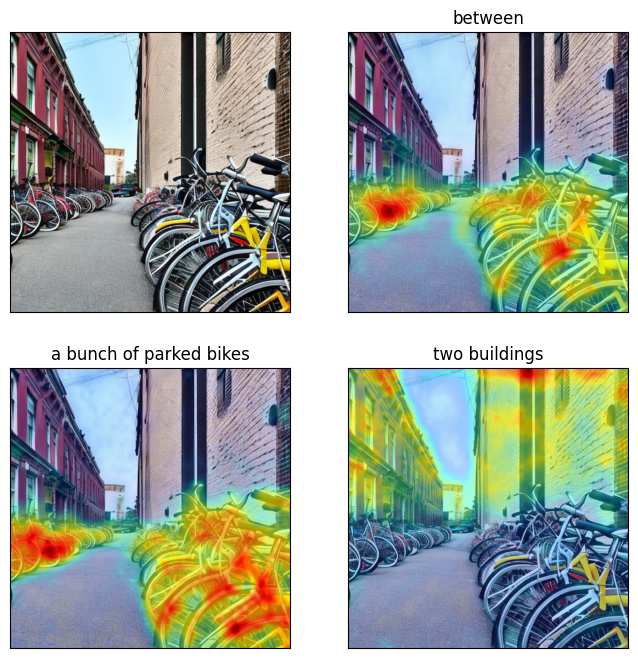

In [ ]:
prompt = 'a bunch of parked bikes sit between two buildings'
image_path = 'experiments/515298/output.png'
output_image = Image.open(image_path)

experiment_path = 'experiments/515298'
exp = GenerationExperiment.load(experiment_path)
heat_map = exp.heat_map()
between_heat_map = heat_map.compute_word_heat_map('between')
bikes_heat_map = heat_map.compute_word_heat_map('a bunch of parked bikes')
buildings_heat_map = heat_map.compute_word_heat_map('two buildings')

plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 2)

# Original image
ax[0, 0].imshow(output_image)

# Heatmaps
between_heat_map.plot_overlay(output_image, ax=ax[0, 1])
bikes_heat_map.plot_overlay(output_image, ax=ax[1, 0])
buildings_heat_map.plot_overlay(output_image, ax=ax[1, 1])

plt.show()

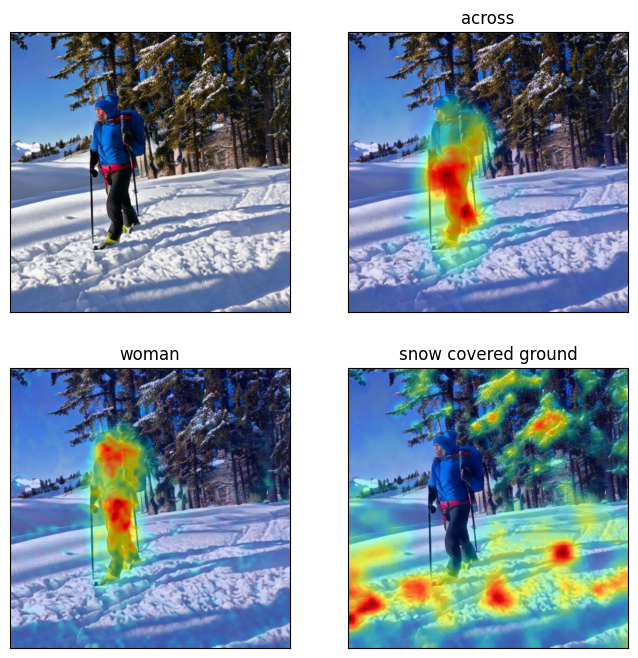

In [ ]:
prompt = 'A woman hiking across snow covered ground with two ski poles.'
image_path = 'experiments/785752/output.png'
output_image = Image.open(image_path)

experiment_path = 'experiments/785752'
exp = GenerationExperiment.load(experiment_path)
heat_map = exp.heat_map()
across_heat_map = heat_map.compute_word_heat_map('across')
woman_heat_map = heat_map.compute_word_heat_map('woman')
ground_heat_map = heat_map.compute_word_heat_map('snow covered ground')

plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 2)

# Original image
ax[0, 0].imshow(output_image)

# Heatmaps
across_heat_map.plot_overlay(output_image, ax=ax[0, 1])
woman_heat_map.plot_overlay(output_image, ax=ax[1, 0])
ground_heat_map.plot_overlay(output_image, ax=ax[1, 1])

plt.show()

Street scene with USA and Mexican flags flying from building above restaurant tables on sidewalk.


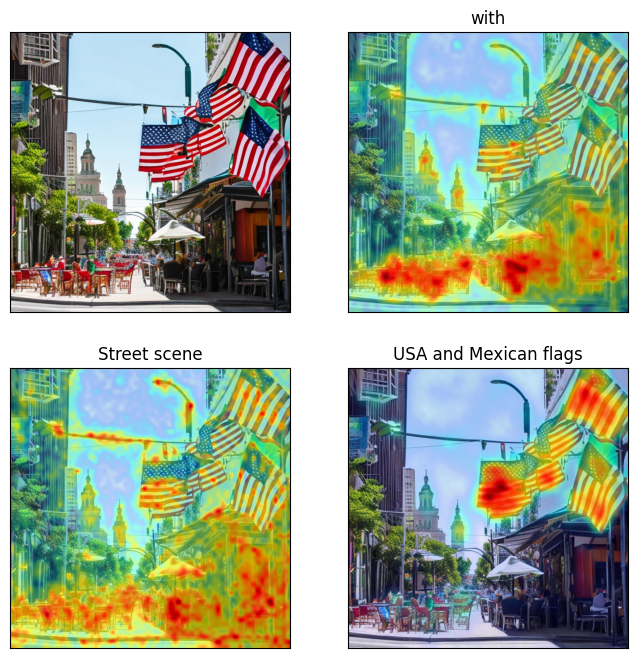

In [ ]:
experiment_path = 'experiments/99171'
exp = GenerationExperiment.load(experiment_path)

output_image = Image.open(f'{experiment_path}/output.png')

with open(f'{experiment_path}/prompt.txt', 'r') as file:
    prompt = file.read()
print(prompt)

heat_map = exp.heat_map()
with_heat_map = heat_map.compute_word_heat_map('with')
scene_heat_map = heat_map.compute_word_heat_map('Street scene')
flags_heat_map = heat_map.compute_word_heat_map('USA and Mexican flags')

plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 2)

# Original image
ax[0, 0].imshow(output_image)

# Heatmaps
with_heat_map.plot_overlay(output_image, ax=ax[0, 1])
scene_heat_map.plot_overlay(output_image, ax=ax[1, 0])
flags_heat_map.plot_overlay(output_image, ax=ax[1, 1])

plt.show()

A close up image of a half onion and mushroom pizza.


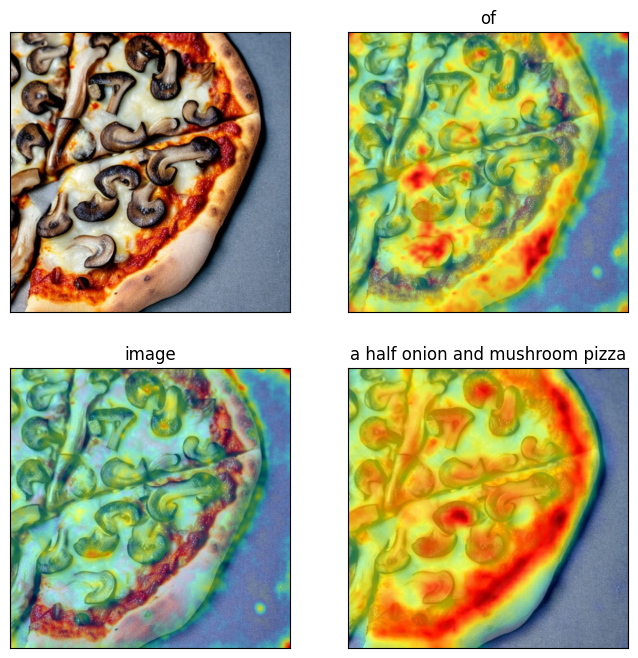

In [ ]:
experiment_path = 'experiments/35767'
exp = GenerationExperiment.load(experiment_path)

output_image = Image.open(f'{experiment_path}/output.png')

with open(f'{experiment_path}/prompt.txt', 'r') as file:
    prompt = file.read()
print(prompt)

heat_map = exp.heat_map()
of_heat_map = heat_map.compute_word_heat_map('of')
image_heat_map = heat_map.compute_word_heat_map('image')
pizza_heat_map = heat_map.compute_word_heat_map('a half onion and mushroom pizza')

plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = make_im_subplots(2, 2)

# Original image
ax[0, 0].imshow(output_image)

# Heatmaps
of_heat_map.plot_overlay(output_image, ax=ax[0, 1])
image_heat_map.plot_overlay(output_image, ax=ax[1, 0])
pizza_heat_map.plot_overlay(output_image, ax=ax[1, 1])

plt.show()